*A Course in Cryptography* by Heiko Knospe, American Mathematical Society, Pure and Applied Undergraduate Texts 40

## Code examples of Chapter 13 - Quantum Computing

This SageMath notebook by Heiko Knospe is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by/4.0/">Creative Commons Attribution 4.0 International License</a>.

Download SageMath from http://www.sagemath.org/download.

### Example 13.13: Discrete Fourier Transform.

In [1]:
def myDFT(a):
    n=a.length()
    y=vector(CC,n)
    for k in range(n):
        sum=0
        for x in range(n):
            sum += a[x]*exp(-2*pi*I*x*k/n)
        y[k]=sum/sqrt(n)    
    return(y)    

In [2]:
a=vector([1,2,1,2]); y=myDFT(a); print(y) # compute the unitary DFT

(3.00000000000000, 0.000000000000000, -1.00000000000000, 0.000000000000000)


Inverse Discrete Fourier Transform.

In [3]:
def myIDFT(y):
    n=y.length()
    a=vector(CC,n)
    for k in range(n):
        sum=0
        for x in range(n):
            sum += y[x]*exp(-2*pi*I*x*k/n)
        a[k]=sum/sqrt(n)    
    return(a)    

In [4]:
myIDFT(y) # IDFT recovers a

(1.00000000000000, 2.00000000000000, 1.00000000000000, 2.00000000000000)

### Example 13.14: Shor's algorithm factorizes $n$ using the multiplicative order of $a$ mod $n$. 

In [5]:
n=77; a=3

Suppose we know already the order $r$ of $a$ mod $n$.

In [6]:
r = mod(a,n).multiplicative_order(); print(r)

30


$r$ is even. $a^{r/2}+1$ mod $n$ gives a number that is divisible by one of the unkown factors of $n$, but not by $n$.

In [7]:
mod(power_mod(a,r//2,n)+1,n)

35

In [8]:
gcd(35,n)

7

### Example 13.16: Shor's algorithm - find the multiplicative order of $a$ mod $n$.

In [9]:
s=13;N=2^s;print(N) # choose N

8192


Look at the terms of $|\psi\rangle$ with second register $u=59$. 

In [10]:
n=77;a=3
u=59                                   # second register, a random value u=a^x mod n
list = []
for x in range(N):
    y = power_mod(a,x,n)
    if (y==u):
        list.append(x)

Print some terms of the state $|\psi\rangle$. The period $r=30$ can be seen here. However, the quantum state is not accessible to an observer!

In [11]:
for x in list:    
    if (x<200 or x>N-200):  # print some terms
        print(x,u)

19 59
49 59
79 59
109 59
139 59
169 59
199 59
7999 59
8029 59
8059 59
8089 59
8119 59
8149 59
8179 59


QFT of the first register of $\psi$. The second register is $u=59$.

In [12]:
# Computation of the QFT
# Inefficient on non-quantum machines. This example may take more than 60 minutes to complete! 
# You may skip this and continue with the next but one cell.
y=vector(CC,N)
for k in range(N):
    sum = 0
    print(".",end="")
    for x in list:
        sum += exp(2*pi*I*x*k/N)
    y[k] = sum/N    

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

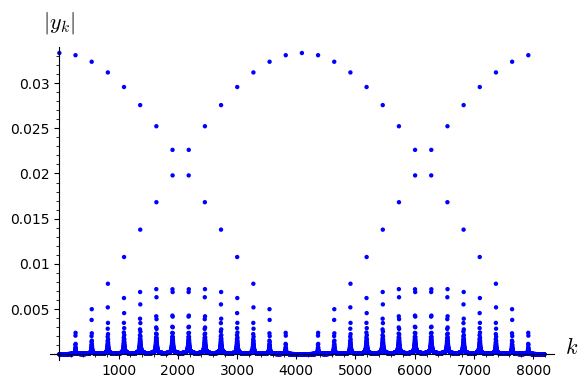

In [20]:
# Plot the coefficients
# requires QFT values from the previous cell
yabs=vector(RR,N)
for k in range(N):
    yabs[k]= abs(y[k])
list_plot(yabs, axes_labels=['$k$','$|y_k|$'])    

In [21]:
# Compute only a few coefficients
ys=vector(CC,N)
for k in range(260,280):
    sum = 0
    for x in list:
        sum += exp(2*pi*I*x*k/N)
    ys[k] = sum/N   

Print absolute absolute values of the coefficients $y_k$. See the peak at $k=273$. Note that $|y_k|^2$ is the probability that $|k,59\rangle$ is measured. 

In [22]:
for k in range(260,280):
    print(k,abs(ys[k]))

260 0.000161466364210936
261 0.000175413634720059
262 0.000191889138720544
263 0.000211646409124348
264 0.000235771421437241
265 0.000265888653247692
266 0.000304542099889304
267 0.000355953118780780
268 0.000427675721009852
269 0.000534694096404268
270 0.000711537035485720
271 0.00105956325386752
272 0.00206022666640847
273 0.0330822163350021
274 0.00237158896231586
275 0.00114909413534390
276 0.000760151950291728
277 0.000569002195443964
278 0.000455365915613345
279 0.000380051094900082


Another peak is (for example) at $k=7100$.

In [23]:
for k in range(7090,7110):
    sum = 0
    for x in list:
        sum += exp(2*pi*I*x*k/N)
    ys[k] = sum/N   

In [24]:
for k in range(7090,7110):
    print(k,abs(ys[k]))

7090 0.000817233595234757
7091 0.000909819069547199
7092 0.00102639457613359
7093 0.00117764855784173
7094 0.00138172652214868
7095 0.00167210822199517
7096 0.00211814459159612
7097 0.00289067576081194
7098 0.00455478835010248
7099 0.0107578597241784
7100 0.0295633934617312
7101 0.00621978088209618
7102 0.00347362457845736
7103 0.00240889309137978
7104 0.00184333446936380
7105 0.00149260964736831
7106 0.00125387259057245
7107 0.00108088976897914
7108 0.000949798723036790
7109 0.000847037342172864


$k$ is an approximate multiple of $\frac{N}{r}$, i.e., $\frac{k}{N} \approx \frac{j}{r}$. Use the continued fraction representation of $\frac{k}{N}$ to find $r$.

In [25]:
k=7100;N=8192
(k/N).continued_fraction()

[0; 1, 6, 1, 1, 136]

Find $\frac{j}{r} \approx \frac{k}{N}$ with $r<n$. Leave out the last fraction $\frac{1}{136}$.

In [26]:
1/(1+1/(6+1/(1+1)))

13/15

$r$ is probably a multiple of $15$.

In [27]:
power_mod(a,15,n) # r=15 does not work

34

In [28]:
power_mod(a,30,n) # r=30 works

1

Hence the order of $a$ mod $n$ is $r=30$.

In [29]:
r=30; print(RR(N/r))

273.066666666667


This explains the spectral peaks at approximate multiples of $273$.

### Exercise 11.

In [30]:
n=47053; a=11

In [31]:
r= mod(a,n).multiplicative_order(); print(r)

7770


Suppose $r$ is known and even. Compute $a^{r/2}+1$ mod $n$ to obtain a multiple of one of the factors of $n$.

In [32]:
mod(power_mod(a,r//2,n)+1,n)

39248

In [33]:
gcd(39248,n)

223

Verify the result.

In [34]:
factor(n)

211 * 223

In [36]:
rp = mod(a,211).multiplicative_order(); print(rp) # order of a mod p is odd

35


In [37]:
rq = mod(a,223).multiplicative_order(); print(rq) # order of a mod q is even

222
